In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [2]:
# Import the dataset
dia_df = pd.read_csv('diabetes.csv')
dia_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [3]:
# Replace 0 with NaNs in 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' columns so we can impute mean/median/mode values to improve our input dataset
dia_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dia_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [4]:
# Replace NaNs with the median value of the columns
#I have chosen the median value becaue it is most logical value to insert into the cose
imputer = SimpleImputer(strategy='median')
dia_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.fit_transform(dia_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
dia_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1
767,1,93.0,70.0,31.0,125.0,30.4,0.315,23,0


In [5]:
# Display summary statistics
print(dia_df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

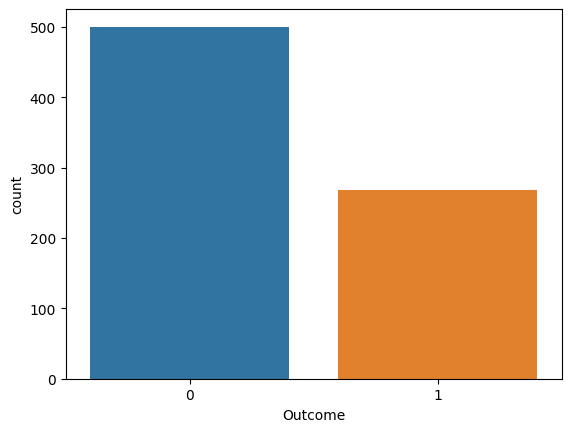

In [6]:
# Univariate analaysis to see spread of the 'Outcome' column
sns.countplot(x='Outcome', data=dia_df)
plt.show()

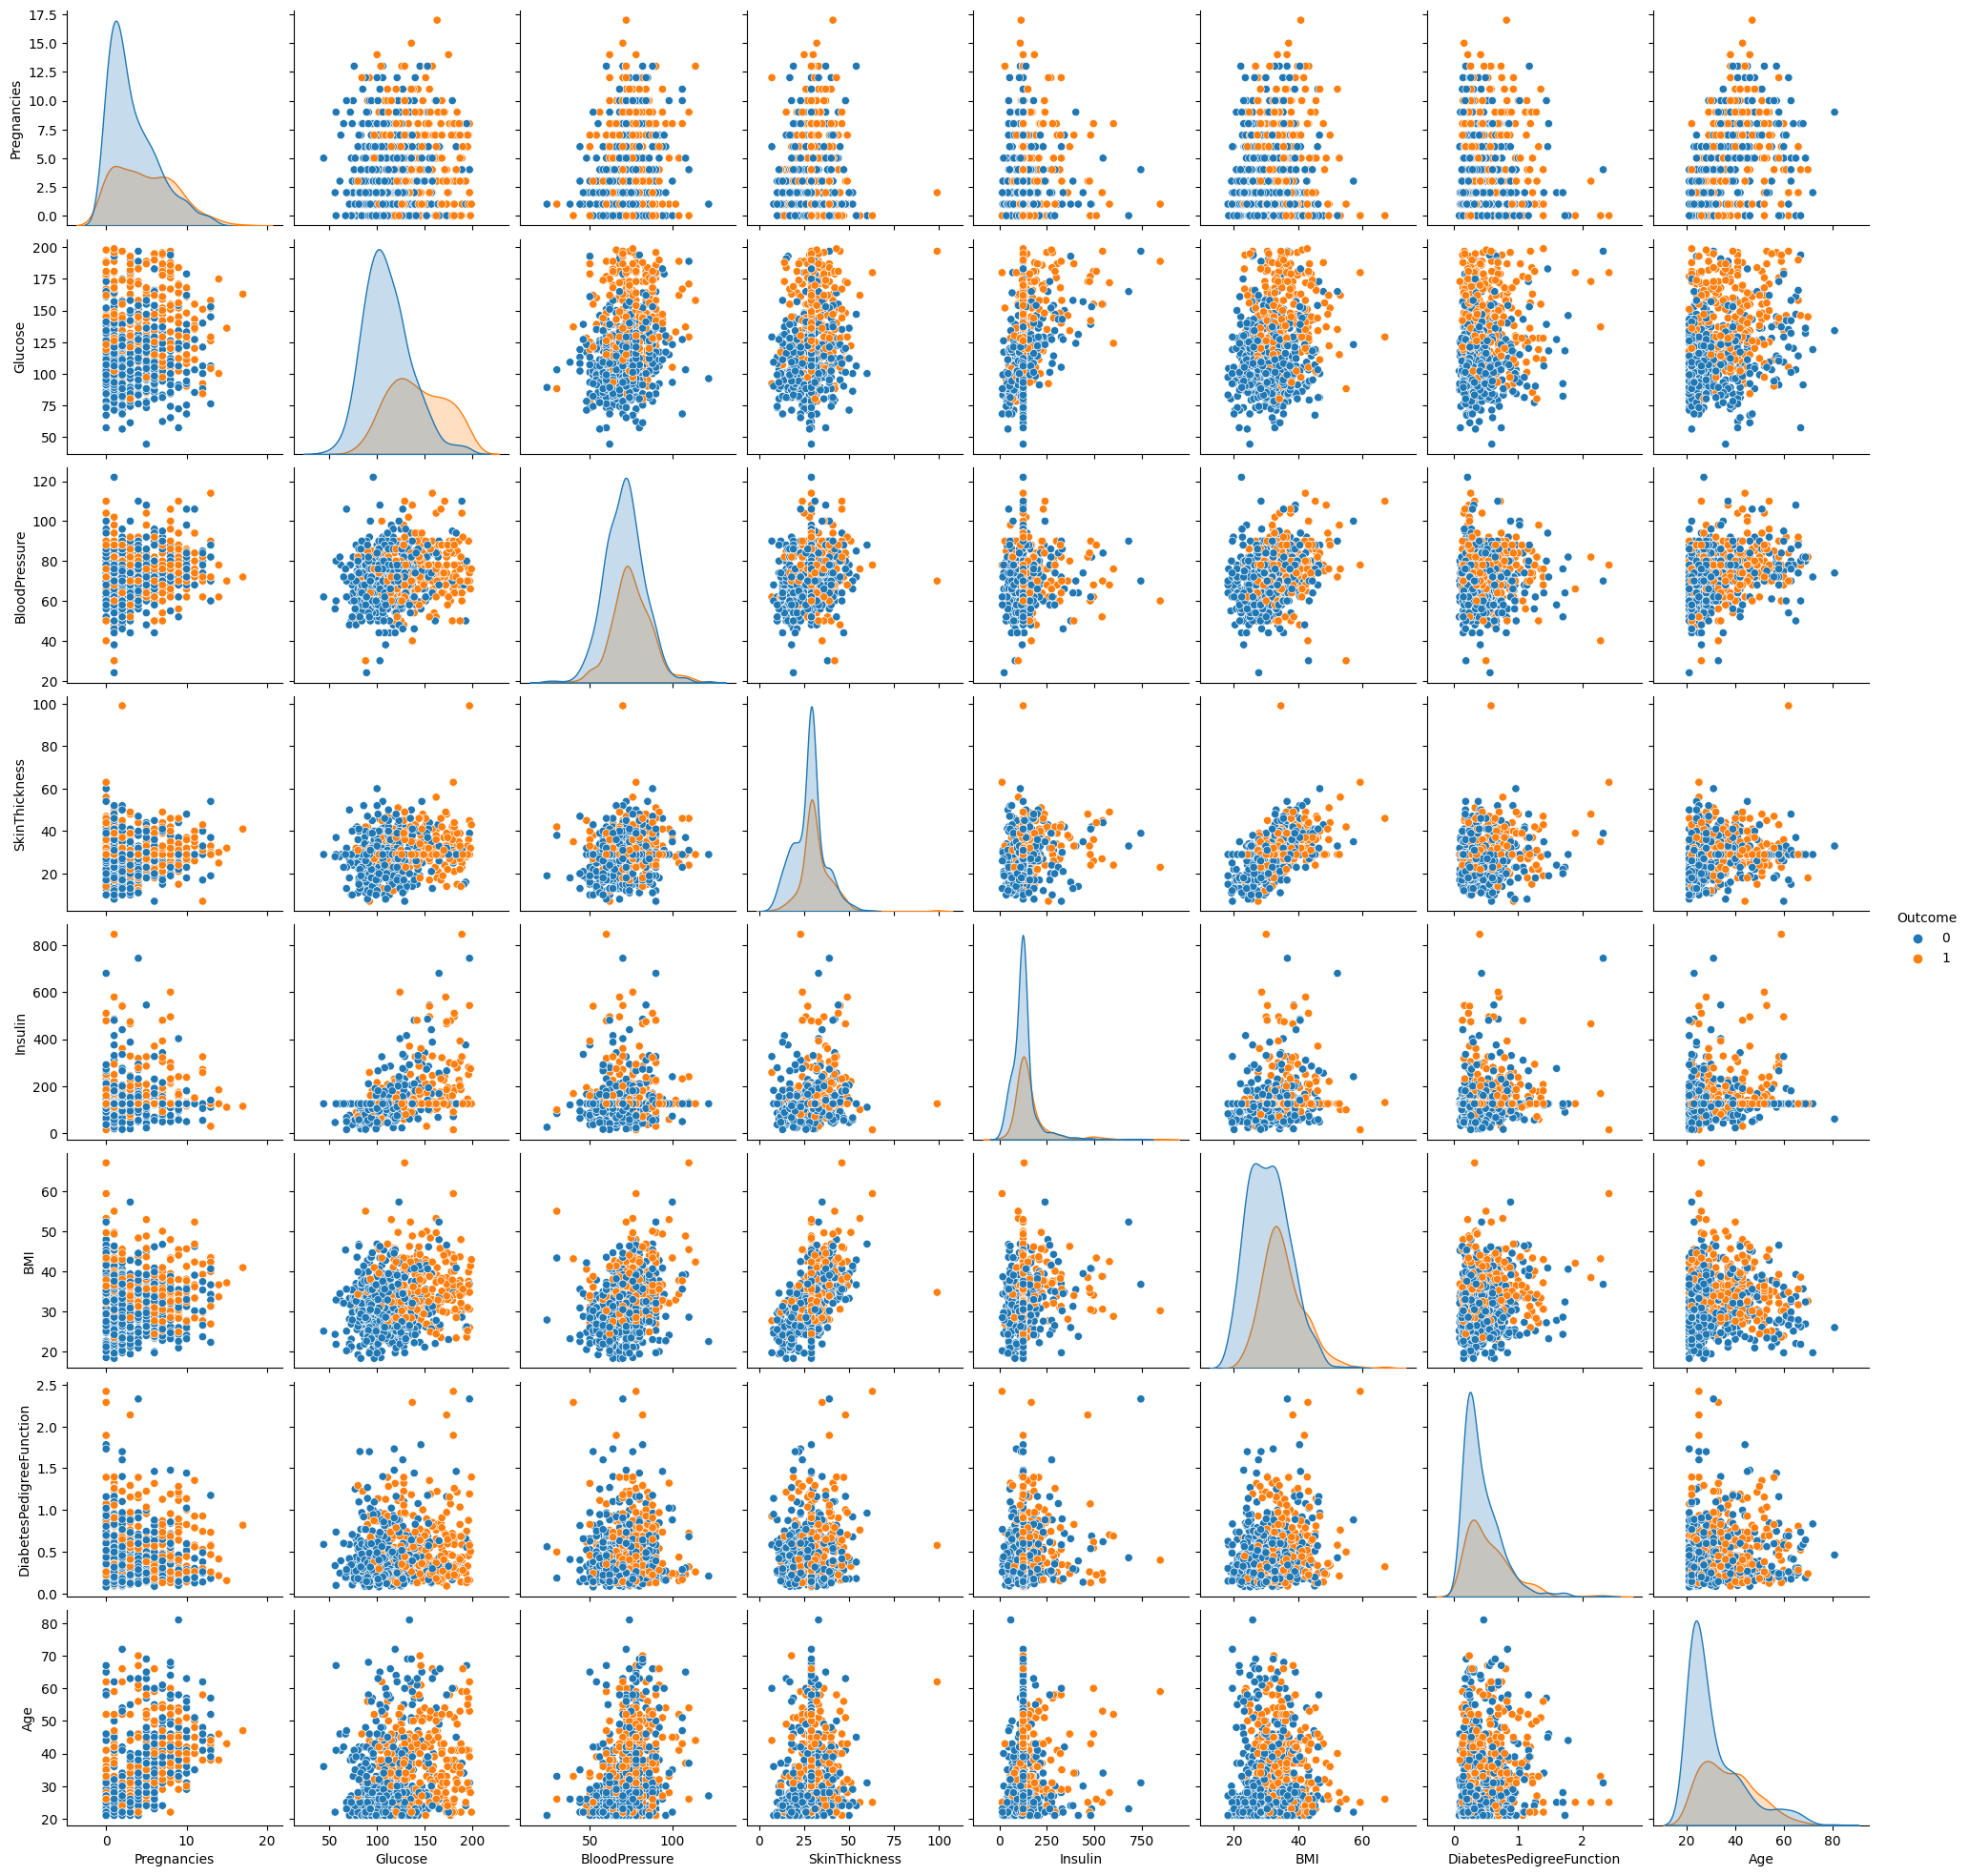

In [7]:
# Bivariate Analysis to see how each variable affects each other
sns.pairplot(dia_df, hue='Outcome')
plt.show()

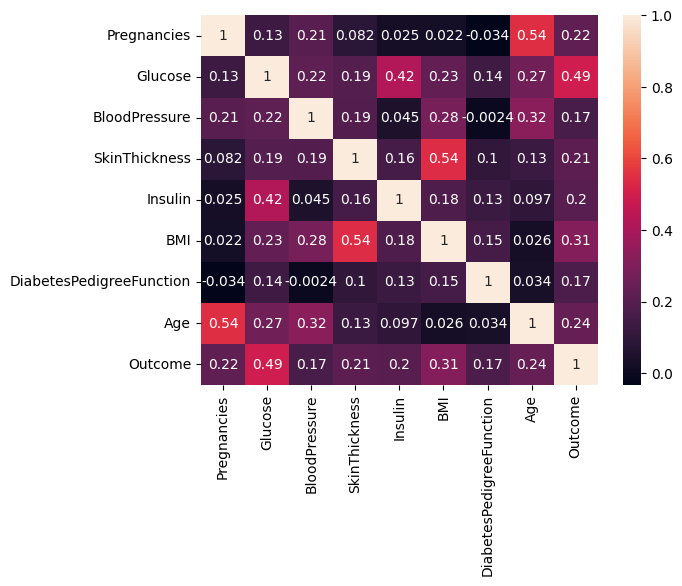

In [8]:
# Display correlation matrix
corr = dia_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
#Building the MLP network
# Defining the Target variable
X = dia_df.drop('Outcome', axis=1)
y = dia_df['Outcome']

In [10]:
# Standardize the features to make sure outliers don't afferdt our predictions
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [11]:
# Split the data into test and train. We are taking a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Using scikit learn MLP FUNCTION
mlp = MLPClassifier(max_iter=1000)

In [13]:
# Using GridSearchCV to hypertune our parameters to optimise our model
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

print('Best params\n', clf.best_params_)

Best params
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [23]:
# Using gridsearch results to hypertune and optimise our model
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
# Calculating the accuracy of our model
accuracy = accuracy_score(y_test, y_pred)
val_accuracy = accuracy_score(y_train, y_pred_train)
print('Validation Accuracy: ', val_accuracy*100)
print('Accuracy: ', accuracy*100)

Validation Accuracy:  85.50488599348535
Accuracy:  80.77922077922078


In [15]:
#Checking other key metrics to evalute model performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Calculate the AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = np.trapz(tpr, fpr)

In [24]:
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)
print('AUC-ROC:', auc)

Precision: 0.6833333333333333
Recall: 0.7363636363636363
F1 score: 0.7086956521739131
AUC-ROC: 0.7919191919191918


In [17]:
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [18]:
y_pred_baseline = mlp.predict(X_test)
# Calculate performance metrics
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print('Baseline Model Accuracy: ', accuracy_baseline*100)

Baseline Model Accuracy:  71.42857142857143


In [20]:
#Checking other key metrics to evalute baseline model performance
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
#f1_score_baseline = f1_score(y_test, y_pred_baseline)

# Calculate the AUC-ROC score
fpr_baseline, tpr_baseline, thresholds_baseline = roc_curve(y_test, y_pred_baseline)
auc_baseline = np.trapz(tpr_baseline, fpr_baseline)

In [22]:
print('Precision:', precision_baseline)
print('Recall:', recall_baseline)
#print('F1 score:', f1_score_baseline)
print('AUC-ROC:', auc_baseline)

Precision: 0.5932203389830508
Recall: 0.6363636363636364
AUC-ROC: 0.6969696969696969
